In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import GridPlot, Scatter

RFBOutputContext()


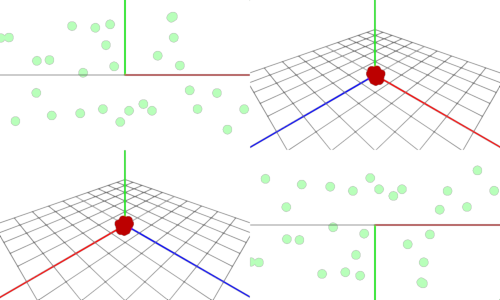

JupyterWgpuCanvas()

In [2]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

# grid with 2 rows and 2 columns
grid_shape = (2, 2)

# define the views, some 2d and some 3d
views = np.array(
    [
        ['2d', '3d'], 
        ['3d', '2d']
    ]
)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = np.array(
    [
        [0, 1],
        [1, 0]
    ]
)

# create the grid plot
grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=grid_shape,
    views=views,
    controllers=controllers
)

# create a random distribution of 100 xyz coordinates
dims = (100, 3)

offset = 3

normal = np.random.normal(size=dims)
cloud = np.vstack(
    [
        normal - offset,
        normal,
        normal + offset,
    ]
)

# colors with a numerical mapping for each offset
colors = np.array(([0] * 100) + ([1] * 100) + ([2] * 100))

for subplot in grid_plot:
    scatter = Scatter(data=cloud, colors=colors, cmap='jet')
    subplot.add_graphic(scatter)
    
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)

# different perspectives on the synced views
grid_plot.subplots[1, 0].camera.scale.x = -1
grid_plot.subplots[1, 1].camera.scale.y = -1

canvas.request_draw(grid_plot.animate)
canvas